# What studios tend to make the most popular movies?

Which studio films are most popular? 

In [2]:
# import libraries
import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
#add connection to the database
conn = sqlite3.connect("movies_database.sqlite")
cur = conn.cursor()

In [4]:
#check tables which we have for work
for row in cur.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('tmdb_movies',)
('imdb_title_crew',)
('tn_movie_budgets',)
('imdb_title_ratings',)
('imdb_name_basics',)
('imdb_title_principals',)
('imdb_title_akas',)
('bom_movie_gross',)
('imdb_title_basics',)
('rt_reviews',)
('rt_movie_info',)


**Selected all studios and count.**
I decided to continue working with the top 200 popular movies.

In [5]:
# How to count sdudios with most popular films?
# 1. Join two tables: one with information about movie popularity, second with studios names
# 2. Convert all the necessary information into the desired format
# 3. Order by popularity desc
# 4. Take only first 200
# 5. Order studios by count of movies
cur.execute('''SELECT studio, count(studio) as count_studio
               FROM
               (SELECT tmdb.*, 
                        bom.studio, 
                        CAST(bom.domestic_gross AS INTEGER) as domestic_gross, 
                        CAST(bom.foreign_gross AS INTEGER) as foreign_gross 
               FROM bom_movie_gross bom
               JOIN tmdb_movies tmdb
               ON bom.title = tmdb.original_title
               ORDER BY popularity DESC
               LIMIT 200) temp
               GROUP BY studio
               ORDER BY count_studio DESC
            ''')
studio = pd.DataFrame(cur.fetchall())
studio.columns = [i[0] for i in cur.description]
studio

,studio,count_studio
0,BV,40
1,Uni.,28
2,Fox,26
3,WB,23
4,Par.,16
5,Sony,14
6,LGF,9
7,WB (NL),6
8,Wein.,5
9,STX,5


Text(0.5, 1.0, 'Top 5 Studios with Most Popular Movies')

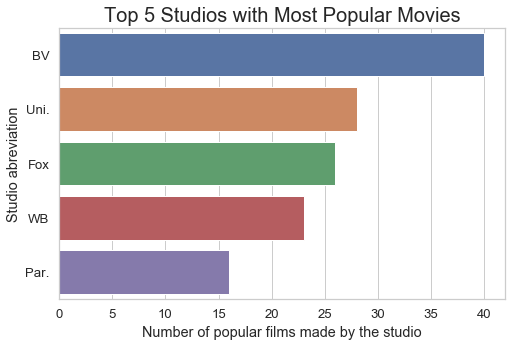

In [9]:
# the most profitable studios
#try to change bars color
plt.figure(figsize=(8,5))
sns.set(style="whitegrid", color_codes=True,font_scale=1.2)
sns.barplot(x='count_studio', 
            y='studio', 
               data=studio[:5])

plt.xlabel('Number of popular films made by the studio')
plt.ylabel('Studio abreviation')
plt.title('Top 5 Studios with Most Popular Movies', fontsize=20)

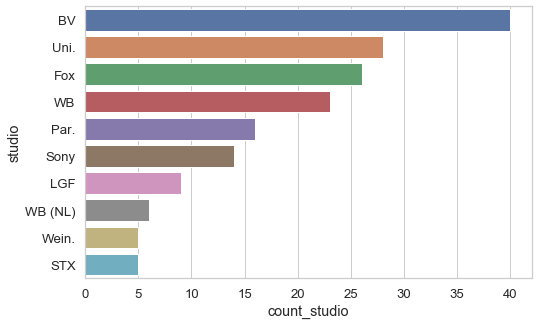

In [10]:
# if we take 10
plt.figure(figsize=(8, 5))
sns.barplot(x='count_studio', y='studio', data=studio[:10])
plt.show()

Are the studios with most popular movies have most high domestic gross.

In [59]:
cur.execute('''SELECT tmdb.*, 
                        bom.studio, 
                        CAST(bom.domestic_gross AS INTEGER) as domestic_gross, 
                        CAST(bom.foreign_gross AS INTEGER) as foreign_gross 
               FROM bom_movie_gross bom
               JOIN tmdb_movies tmdb
               ON bom.title = tmdb.original_title
               ORDER BY popularity DESC
               LIMIT 200''')
studio_gross = pd.DataFrame(cur.fetchall())
studio_gross.columns = [i[0] for i in cur.description]
studio_gross

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross
0,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,BV,678800000,1.0
1,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,LG/S,43000000,45700000.0
2,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,WB (NL),255100000,700900000.0
3,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958,BV,333200000,440200000.0
4,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679,WB,92100000,167200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23897,"[28, 12, 35, 14]",353486,en,Jumanji: Welcome to the Jungle,20.395,2017-12-20,Jumanji: Welcome to the Jungle,6.7,7213,Sony,404500000,557600000.0
196,14,"[27, 80]",41439,en,Saw 3D,20.370,2010-10-28,Saw: The Final Chapter,6.0,1488,LGF,45700000,90400000.0
197,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909,Sum.,300500000,398000000.0
198,7892,"[16, 10751]",62211,en,Monsters University,20.330,2013-06-21,Monsters University,7.0,6362,BV,268500000,475700000.0


Text(0.5, 1.0, '___')

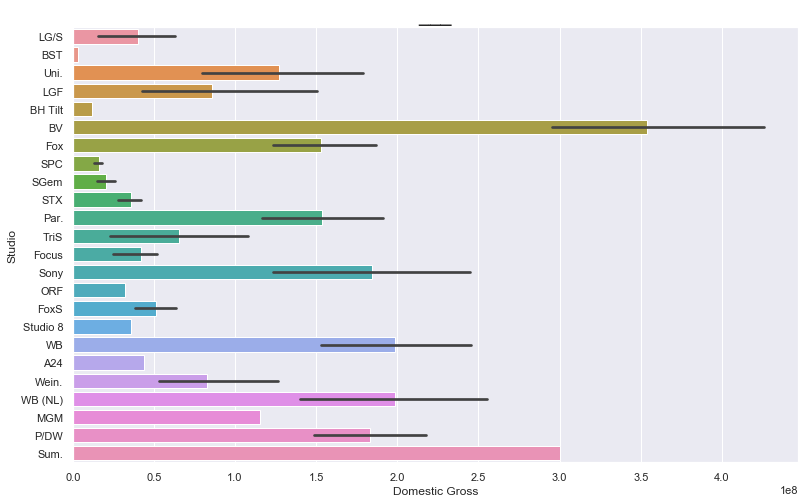

In [71]:
plt.figure(figsize=(13,8))
sns.set_style('ticks')
sns.set(font_scale=1)
sns.barplot(x='domestic_gross', 
            y='studio', 
            data=studio_gross.sort_values(by='domestic_gross'))
plt.xlabel('Domestic Gross')
plt.ylabel('Studio')
plt.title('___', fontsize=20)

# Summary

Buena Vista studio overtook the rest of the studios in terms of characteristics.